<a href="https://colab.research.google.com/github/capozzolicaluan/MSWEPtest/blob/main/extraiMSWEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Limpar todas as variáveis
from IPython import get_ipython
get_ipython().magic('reset -sf')

# Código para reiniciar o ambiente do Colab
import os
os.kill(os.getpid(), 9)

In [1]:
pip install netcdf4

In [18]:
# Importando as bibliotecas necessárias
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime, timedelta
import gc
import os
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import data_table
import math
from matplotlib.colors import TABLEAU_COLORS, same_color
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import glob
import xarray as xr


# Liberar memória manualmente
_ = gc.collect()

In [19]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [20]:
caminho_teste = "/content/drive/MyDrive/MSWEP_V280/NRT/3hourly"

In [28]:
arquivos=os.listdir(caminho_teste)
# Filtra apenas os arquivos que começam com os anos desejados
anos_validos = ("2020", "2021", "2022", "2023", "2024")
arquivos_filtrados = [arq for arq in arquivos if arq.startswith(anos_validos)]

In [29]:
lista_arquivos = [os.path.join(caminho_teste, nome) for nome in arquivos_filtrados]

In [ ]:
len(lista_arquivos)

In [ ]:
lista_arrays = []

for i, arquivo in enumerate(lista_arquivos):
        ds = xr.open_dataset(arquivo)
        da = ds['precipitation']
        lista_arrays.append(da)

empilhado = xr.concat(lista_arrays, dim="time")

In [24]:
empilhado

<xarray.DataArray 'precipitation' (time: 4, lat: 1800, lon: 3600)> Size: 207MB
array([[[0.21533359, 0.21533339, 0.21533731, ..., 0.2155831 ,
         0.21559075, 0.21558821],
        [0.29232561, 0.29180308, 0.29179951, ..., 0.29242272,
         0.29242777, 0.29242966],
        [0.29221831, 0.28851047, 0.29169142, ..., 0.29237624,
         0.29237562, 0.29237503],
        ...,
        [0.02596877, 0.02582223, 0.0257284 , ..., 0.01760426,
         0.01760144, 0.01758622],
        [0.02596284, 0.02567123, 0.02566835, ..., 0.01760963,
         0.01760886, 0.01760075],
        [0.02867496, 0.02835274, 0.02824067, ..., 0.01934979,
         0.01934696, 0.0193999 ]],

       [[0.07008929, 0.07009106, 0.07009164, ..., 0.07004005,
         0.07003915, 0.07003259],
        [0.06575438, 0.06575452, 0.06575268, ..., 0.06647783,
         0.06647882, 0.06575614],
        [0.06575636, 0.06512363, 0.06575762, ..., 0.0664769 ,
         0.066477  , 0.06575291],
...
        [0.05619829, 0.05568122, 0.05570551, ..., 0.05604531,
         0.05605016, 0.05605568],
        [0.0561916 , 0.05517919, 0.05517935, ..., 0.05604666,
         0.05604595, 0.0560421 ],
        [0.05749139, 0.05699989, 0.05701931, ..., 0.05672053,
         0.05672417, 0.05616603]],

       [[0.04312197, 0.04312453, 0.04311942, ..., 0.04334378,
         0.04334862, 0.04334346],
        [0.04323175, 0.04323292, 0.04323276, ..., 0.04327036,
         0.04327296, 0.04327458],
        [0.04318834, 0.04284761, 0.0431894 , ..., 0.04325265,
         0.04325133, 0.04325808],
        ...,
        [0.06118134, 0.06059974, 0.06060131, ..., 0.05930675,
         0.05930442, 0.05930654],
        [0.06117646, 0.06002302, 0.06003175, ..., 0.05930917,
         0.05930219, 0.05930416],
        [0.06119908, 0.06064233, 0.06065192, ..., 0.05912732,
         0.05912769, 0.05855552]]])
Coordinates:
  * lon      (lon) float32 14kB -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * time     (time) datetime64[ns] 32B 2025-02-12T09:00:00 ... 2025-02-12
Attributes:
    units:    mm/3h

In [25]:
# Example: Extract precipitation at a specific location and time
latitude = 34.0
longitude = -118.0
time_index = 0  # Example time index

precipitation_at_point = empilhado.sel(lat=latitude, lon=longitude, method='nearest').values

In [26]:
precipitation_at_point

array([4.90534690e-02, 9.54815187e-06, 5.59561886e-06, 8.69150972e-06])

In [33]:
# Example: Extract precipitation at a specific location and time
latitude = 34.0
longitude = -118.0
time_index = 0  # Example time index

precipitation_at_point = ds['precipitation'].sel(lat=latitude, lon=longitude, time=ds.time[time_index], method='nearest').values
print(f"Precipitation at ({latitude}, {longitude}) at time {ds.time[time_index].values}: {precipitation_at_point}")


Precipitation at (34.0, -118.0) at time 2020-11-25T18:00:00.000000000: 0.0012643347145058215


In [ ]:
arquivos=os.listdir("/content/drive/MyDrive/Colab/PYGEO/RESULTADOS/resultadosM6/imagens_sp")

In [10]:
lon=30
lat=10
ts=data_var.sel(x=lon, y=lat, method="nearest")

KeyError: "'x' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'lon': 3600, 'lat': 1800, 'time': 1})"

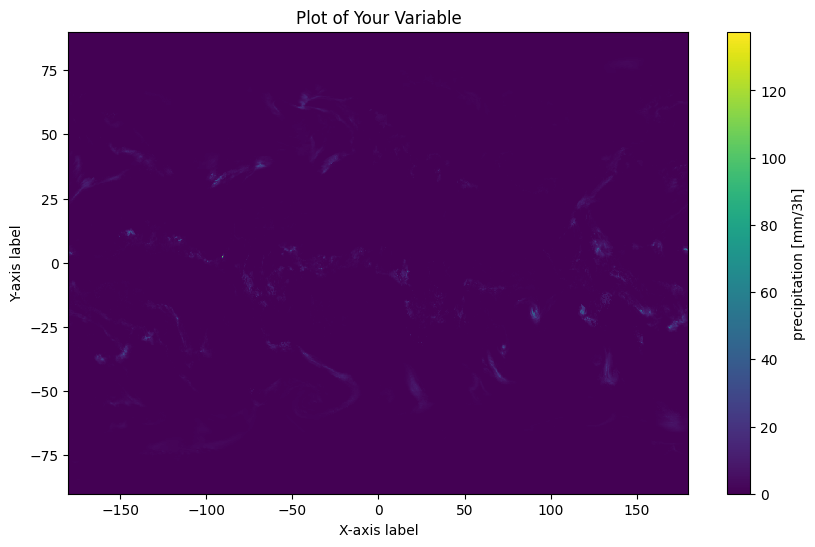

In [19]:
plt.figure(figsize=(10, 6))
data_var.plot()
plt.title('Plot of Your Variable')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

In [ ]:
lon=30
lat=10
ts=da.sel(x=lon, y=lat, method="nearest")

In [ ]:
caminho_dataset = f"{caminho_teste}/2020330.18.nc"
dataset = Dataset(caminho_dataset,'r')
global_precip = dataset.variables['precipitation'][:]
dataset.close()

In [ ]:
caminho_dataset = f"{caminho_teste}/2020330.18.nc"
dataset = Dataset(caminho_dataset,'r')
global_precip = dataset.variables['precipitation'][:]
dataset.close()

In [ ]:
global_precip[0]

masked_array(
  data=[[5.96511285e-02, 5.96523040e-02, 5.96509801e-02, ...,
         5.97234098e-02, 5.97237569e-02, 5.97220794e-02],
        [6.57920773e-02, 6.57845178e-02, 6.57902917e-02, ...,
         6.57958247e-02, 6.57910355e-02, 6.57954893e-02],
        [6.57772463e-02, 6.47813235e-02, 6.57783088e-02, ...,
         6.57950186e-02, 6.57928605e-02, 6.57926626e-02],
        ...,
        [4.39526048e-06, 9.54960706e-06, 3.69909685e-06, ...,
         3.45252920e-06, 6.78445213e-06, 4.55573900e-06],
        [6.37385529e-06, 6.89178705e-08, 6.74760668e-06, ...,
         1.81986252e-06, 4.48885839e-06, 9.75793228e-07],
        [5.29689714e-07, 8.10093479e-06, 8.34371895e-06, ...,
         7.18858792e-06, 3.31550837e-07, 4.53431858e-06]],
  mask=False,
  fill_value=1e+20)

TypeError: Invalid shape (1, 1800, 3600) for image data

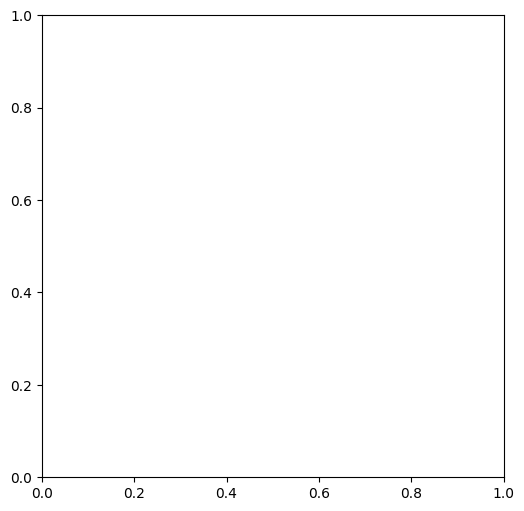

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(global_precip, cmap='Blues', origin='upper')  # origin depende do seu raster
plt.colorbar(label='Precipitação (mm ou outra unidade)')
plt.title('Distribuição espacial da chuva')
plt.show()

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1800, 3600)

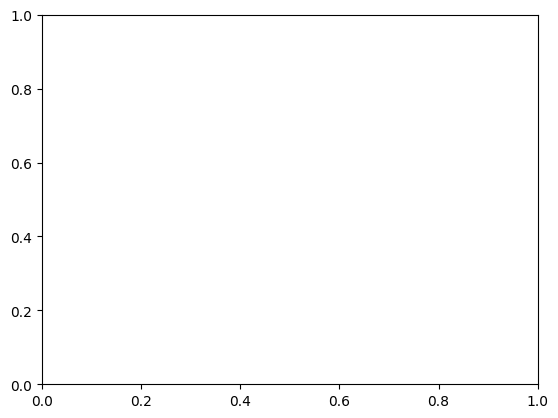

In [ ]:
plt.plot(global_precip,vmin=0,vmax=30)
plt.colorbar()
plt.title("Precipitation on April 25, 2020 (mm/day)")
plt.show()